In [2]:
import cv2
import pandas as pd
import glob

In [10]:
path = "/Users/boyander/IRONHACK/LEARNING/machine-learning/4-supervised-learning-face-recognition/faces-datamad0320"

fullpath = f"{path}/homogeneas/**/*.jpg"
print(fullpath)

faceFiles = glob.glob(fullpath)

/Users/boyander/IRONHACK/LEARNING/machine-learning/4-supervised-learning-face-recognition/faces-datamad0320/homogeneas/**/*.jpg


In [28]:
pics = dict()
for foto in faceFiles:
    label = foto.split("/")[-2]
    pic = foto
    if label in pics:
        pics[label].append(pic)
    else:
        pics[label] = [pic]

In [30]:
im = []
for k,v in pics.items():
    for a in v:
        im.append([k,a])
faces_df =  pd.DataFrame(im, columns=["label","foto"])
display(faces_df)


,label,foto
0,diego,/Users/boyander/IRONHACK/LEARNING/machine-lear...
1,diego,/Users/boyander/IRONHACK/LEARNING/machine-lear...
2,diego,/Users/boyander/IRONHACK/LEARNING/machine-lear...
3,diego,/Users/boyander/IRONHACK/LEARNING/machine-lear...
4,diego,/Users/boyander/IRONHACK/LEARNING/machine-lear...
...,...,...
143,manuel,/Users/boyander/IRONHACK/LEARNING/machine-lear...
144,manuel,/Users/boyander/IRONHACK/LEARNING/machine-lear...
145,manuel,/Users/boyander/IRONHACK/LEARNING/machine-lear...
146,manuel,/Users/boyander/IRONHACK/LEARNING/machine-lear...


In [31]:
faces_df.label.value_counts()

miriam      10
david_c     10
maria       10
diego       10
carolina    10
jesus       10
ana         10
yuver       10
luis        10
sergio      10
sole        10
flori       10
albert      10
manuel       9
silvia       9
Name: label, dtype: int64

In [32]:
import random
who = random.choice(faces_df.label)

In [36]:
clara = pics[who]
clara[0]

'/Users/boyander/IRONHACK/LEARNING/machine-learning/4-supervised-learning-face-recognition/faces-datamad0320/homogeneas/manuel/01.jpg'

[[289 330 192 192]]


array([[157, 157, 156, ..., 219, 219, 220],
       [161, 156, 154, ..., 219, 219, 220],
       [155, 154, 155, ..., 219, 219, 221],
       ...,
       [122, 122, 122, ..., 213, 214, 213],
       [122, 121, 121, ..., 213, 212, 214],
       [122, 121, 121, ..., 213, 212, 213]], dtype=uint8)

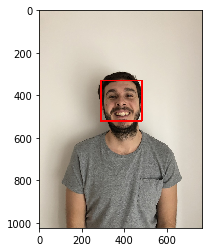

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')

def extractFace(picFile, debug=False):
    im = cv2.imread(picFile)    
    im_bw = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    #plt.imshow(im_bw, cmap="gray")
    # Face detection, OJO: esto detecta multiples caras
    faces = face_cascade.detectMultiScale(im_bw, 2, 4)

    if len(faces) == 0:
        print(f"Warning: no face detected on {picFile}")
        return 
    
    if debug:
        print(faces)
    selected_face = faces[0]
    discard_faces = faces[1:]
    
    if debug:
        debug_squares = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        # plot the invalid squares in blue
        for face in discard_faces:
            x,y,w,h = face
            debug_squares = cv2.rectangle(debug_squares, (x,y), (x+w,y+h),(0, 0, 255) ,5)
        # plot the selected face in red
        x,y,w,h = selected_face
        debug_squares = cv2.rectangle(debug_squares, (x,y), (x+w,y+h),(255, 0, 0) ,5)

        plt.imshow(debug_squares)

            
    # extract selected face as B&W 
    x,y,w,h = selected_face
    cara = im_bw[y:y+h,x:x+h]
    return cara

    
    
    
extractFace(clara[0], debug=True)

[[289 330 192 192]]
[[282 363 192 192]]
[[281 365 192 192]]
[[283 393 192 192]]
[[302 403 192 192]]
[[284 396 192 192]]
[[273 392 192 192]]
[[282 398 192 192]]
[[303 436 192 192]]


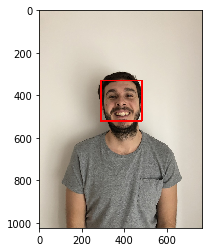

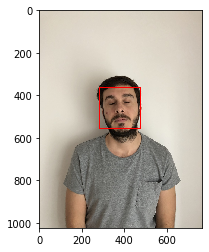

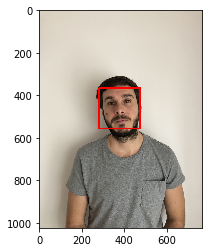

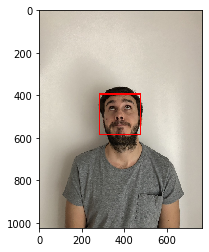

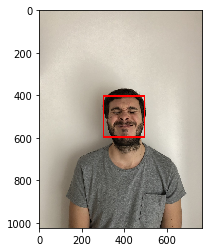

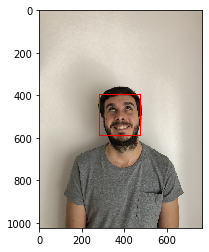

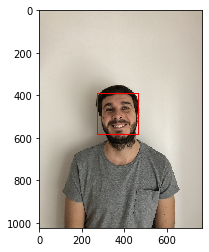

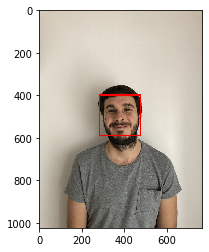

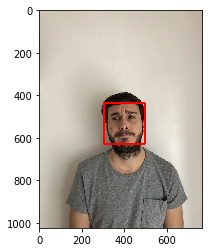

In [38]:
for claraPic in clara:
    plt.figure()
    extractFace(claraPic, debug=True)

In [39]:
# Extract all faces
claraFaces = [extractFace(claraPic) for claraPic in clara]

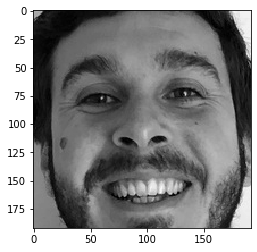

In [40]:
plt.imshow(claraFaces[0], cmap="gray")

In [41]:
import numpy as np

# Filter out invalid faces
claraFaces = [a for a in claraFaces if isinstance(a, np.ndarray)]

In [42]:
# Normalize the size of all faces
dim = (100,100)
claraNormalized = [cv2.resize(a, dim, interpolation=cv2.INTER_AREA) for a in claraFaces]

In [43]:
[a.shape for a in claraNormalized]

[(100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100),
 (100, 100)]

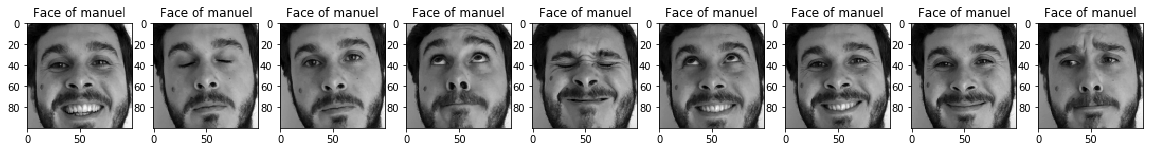

In [45]:
def printMyFace(facesImages, label):
    plt.figure(figsize=(20,5))
    for i,a in enumerate(facesImages):
        plt.subplot(1,len(facesImages), i + 1)
        plt.imshow(a, cmap="gray")
        plt.title(f"Face of {label}")

printMyFace(claraNormalized, label=who)

In [46]:
# Wrap all in one fn

def processFiles(files, dim=(100,100)):
    output_faces = []
    for incomingFile in files: 
        face = extractFace(incomingFile)
        if  isinstance(face, np.ndarray):
            face = cv2.resize(face, dim, interpolation=cv2.INTER_AREA)
            output_faces.append(face)
    return output_faces
            


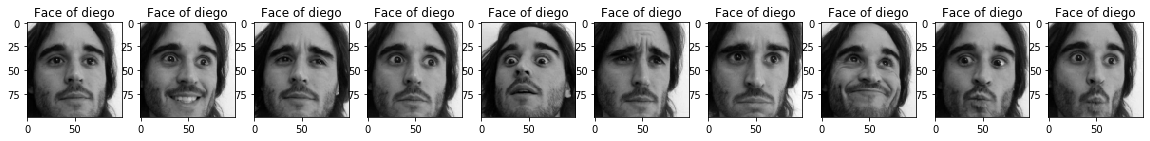

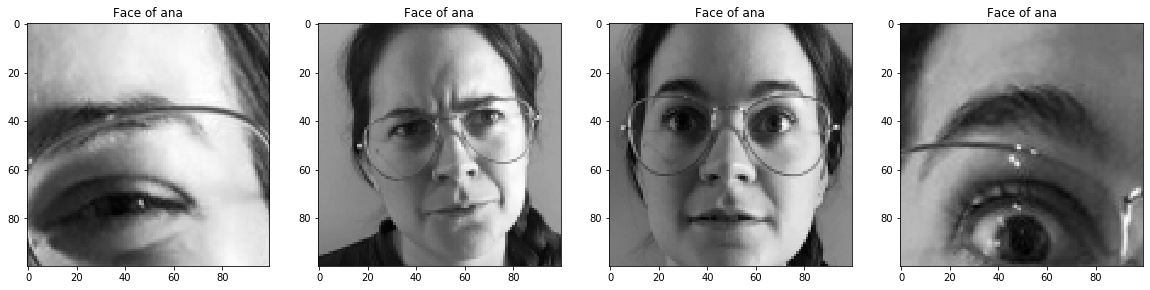

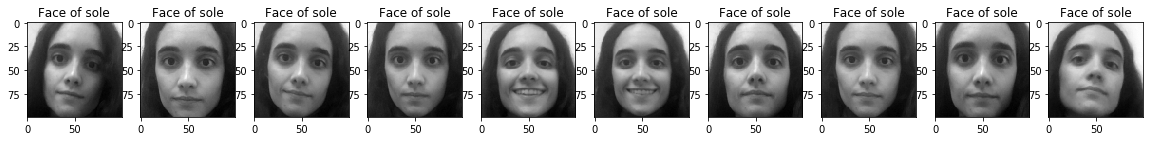

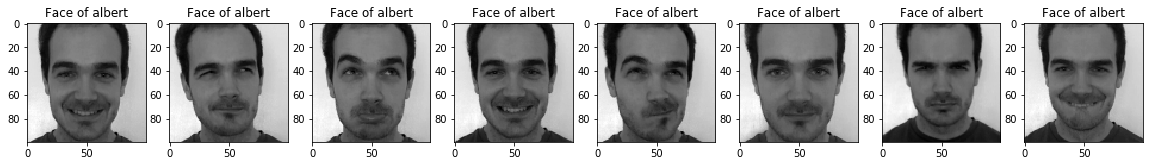

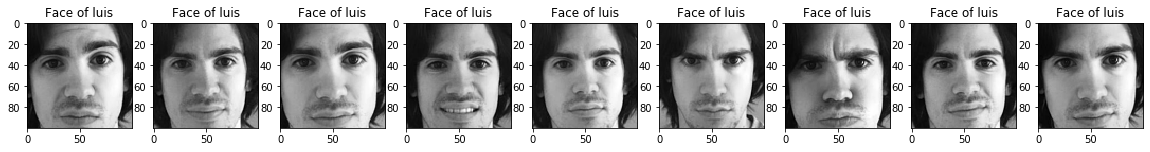

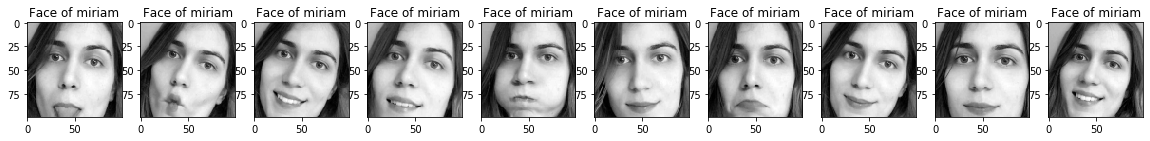

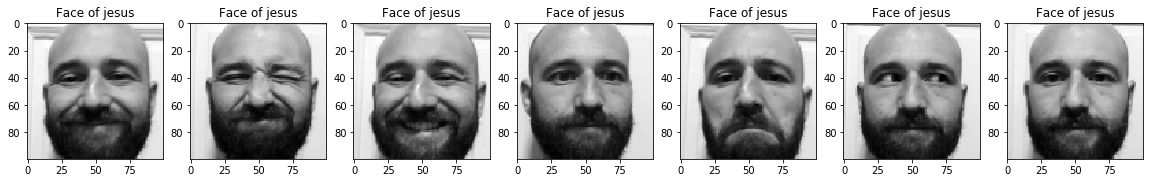

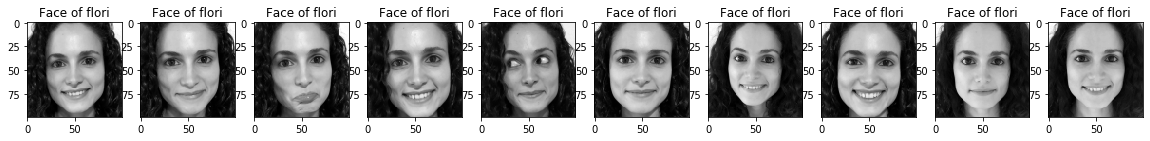

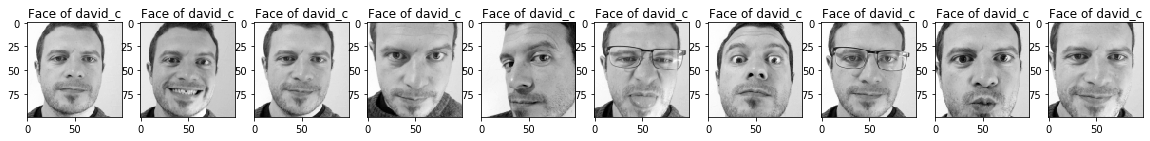

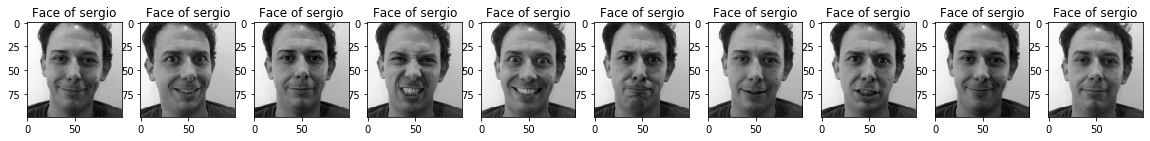

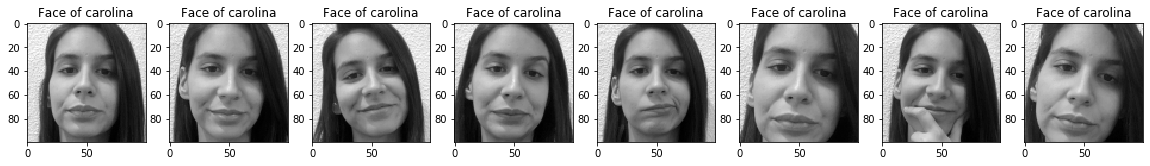

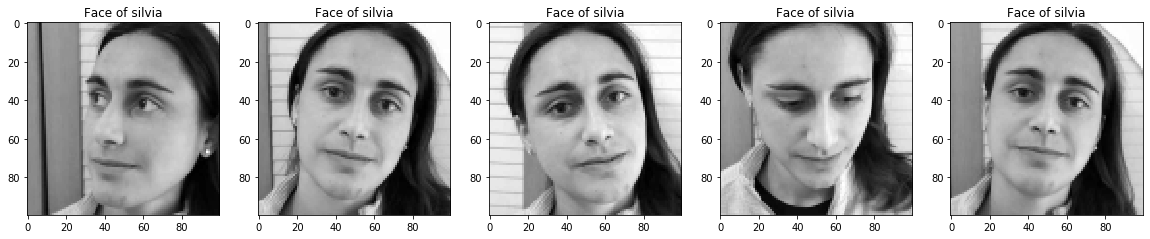

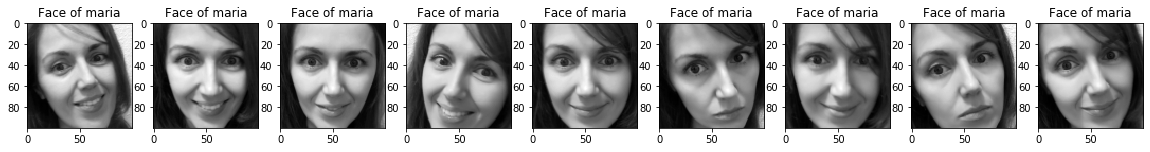

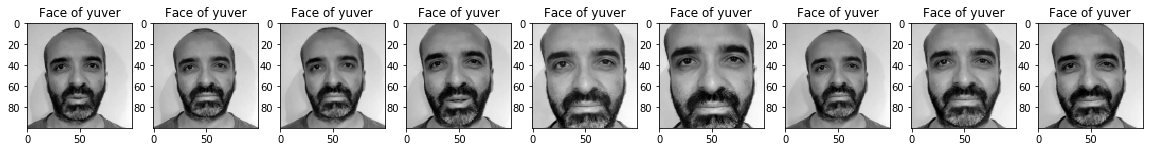

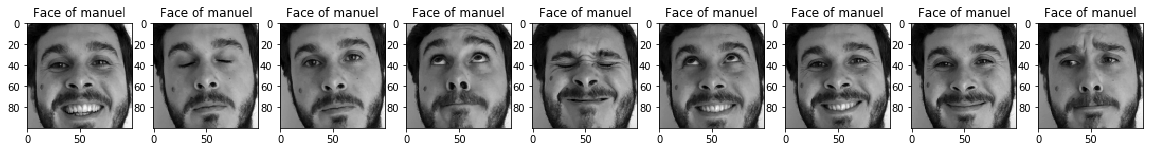

In [47]:
for label,fotos in pics.items():
    faces = processFiles(fotos)
    printMyFace(faces,label=label)


array([-1.88700035e-02,  3.77482660e-02, -5.18112024e-03, -5.66546097e-02,
       -5.29281795e-02,  6.63705021e-02, -3.33894789e-02, -2.16419995e-03,
        1.18111454e-01, -7.21813291e-02,  2.27837548e-01, -4.33267169e-02,
       -3.41502607e-01, -2.59764493e-04, -2.54935957e-02,  7.33651668e-02,
       -1.01110511e-01, -4.34441902e-02, -1.13808371e-01, -1.22228883e-01,
       -2.53519453e-02,  5.99494353e-02, -6.97688013e-03,  2.70228311e-02,
       -6.02850765e-02, -3.38940173e-01, -3.82018462e-02, -9.38338190e-02,
        5.08637056e-02, -1.56276688e-01, -4.54821847e-02,  6.36933669e-02,
       -1.79233491e-01, -3.26985084e-02,  4.31266911e-02,  3.11776605e-02,
       -8.19752142e-02, -1.05809249e-01,  2.45315596e-01,  7.44619519e-02,
       -3.44368964e-02,  2.40111053e-02,  4.26292568e-02,  2.68667698e-01,
        5.84381521e-02,  2.51580905e-02,  2.67998911e-02, -5.37254065e-02,
        1.50230557e-01, -2.06986114e-01,  7.46539235e-02,  1.59787714e-01,
        1.36324897e-01,  

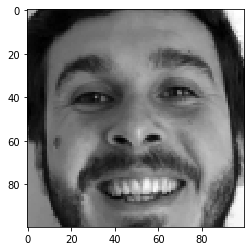

In [141]:
import face_recognition

def extractFeatures(faceIm, useFeats="face",debug=False):
    if debug:
        plt.figure()
        plt.imshow(faceIm, cmap="gray")
    if useFeats == "fft":
        fft2d = np.log(np.abs(np.fft.fft2(faceIm)))
        fft2d = fft2d[0:len(fft2d)//2,0:len(fft2d)//2]
        fft2d = fft2d[5:20,5:20]
        
        if debug:
            plt.figure()
            plt.imshow(fft2d, cmap="gray")
            print(fft2d.shape)
        
        return np.hstack(fft2d)
    elif useFeats == "face":
        imcol = cv2.cvtColor(faceIm, cv2.COLOR_GRAY2RGB)
        feats = face_recognition.face_encodings(imcol)
        if len(feats) > 0:
            return feats[0]
        return None
    
extractFeatures(claraNormalized[0], debug=True)

In [142]:
featurized_dataset = []
for label,fotos in pics.items():
    faces = processFiles(fotos)
    print(f"Processing {label}....")
    for i,face in enumerate(faces):
        featurized_dataset.append({
            "label":label,
            "picName":i,
            "feats":extractFeatures(face)
        })


Processing diego....
Processing ana....
Processing sole....
Processing albert....
Processing luis....
Processing miriam....
Processing jesus....
Processing flori....
Processing david_c....
Processing sergio....
Processing carolina....
Processing silvia....
Processing maria....
Processing yuver....
Processing manuel....


In [143]:
df = pd.DataFrame(featurized_dataset)
df.head()

,label,picName,feats
0,diego,0,"[0.0016024410724639893, 0.0936703234910965, 0...."
1,diego,1,"[3.1560659408569336e-05, 0.07863743603229523, ..."
2,diego,2,"[-0.03646218776702881, 0.17937122285366058, 0...."
3,diego,3,"[-0.023488737642765045, 0.11564771831035614, 0..."
4,diego,4,"[-0.0645393654704094, 0.10299929231405258, 0.1..."


In [95]:
df.label.value_counts()

miriam      10
david_c     10
diego       10
sergio      10
sole        10
flori       10
maria        9
manuel       9
yuver        9
luis         9
carolina     8
albert       8
jesus        7
silvia       5
ana          4
Name: label, dtype: int64

In [149]:
df = df[~df.feats.isna()]

In [150]:
df.feats.isna().value_counts()

False    124
Name: feats, dtype: int64

In [151]:
y = df.label
X = np.vstack(df.feats)

In [152]:
print(X.shape,y.shape)

(124, 128) (124,)


In [153]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y_numeric = le.transform(y)
y_numeric

array([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  1,  1, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13,  0,  0,  0,  0,  0,  0,  0,  0,  7,  7,  7,  7,
        7,  7,  7,  7,  7, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  6,  6,
        6,  6,  6,  6,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  3,  3,
        3,  3,  3,  3,  3,  3,  3, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        2,  2,  2,  2,  2,  2,  2,  2, 12, 12, 12, 12, 12,  9,  9,  9,  9,
        9,  9,  9,  9, 14, 14, 14, 14, 14, 14, 14, 14, 14,  8,  8,  8,  8,
        8,  8,  8,  8,  8])

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2)

In [155]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [156]:
model.predict(X_test)

array([ 5,  9,  4,  0, 10,  5, 13,  3, 11, 13, 10,  5,  2, 14, 10, 14,  2,
       13,  5, 12, 13, 14, 12,  9,  2])

In [157]:
y_pred = model.predict(X_test)
pd.DataFrame({
    "pred": le.inverse_transform(y_pred),
    "real": le.inverse_transform(y_test)
})

,pred,real
0,flori,flori
1,maria,maria
2,diego,diego
3,albert,albert
4,miriam,miriam
5,flori,flori
6,sole,sole
7,david_c,david_c
8,sergio,sergio
9,sole,ana


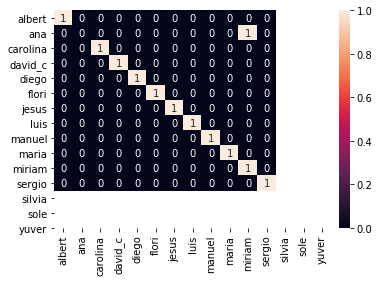

In [158]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred), normalize="true")
sns.heatmap(cm, annot=True,xticklabels=le.classes_, yticklabels=le.classes_)

In [122]:
le.classes_

array(['albert', 'ana', 'carolina', 'david_c', 'diego', 'flori', 'jesus',
       'luis', 'manuel', 'maria', 'miriam', 'sergio', 'silvia', 'sole',
       'yuver'], dtype=object)